In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
df=data
df.shape

(1453, 15)

In [3]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
# Subset the data and convert to matrix
MD_x = np.matrix(df.iloc[:, :11])
MD_x

matrix([['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
        ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
        ['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'],
        ...,
        ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
        ['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'],
        ['No', 'Yes', 'No', ..., 'Yes', 'No', 'Yes']], dtype=object)

In [6]:
# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)
MD_x

matrix([[0, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        [0, 1, 1, ..., 1, 1, 0],
        ...,
        [1, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 1, 0, 1]])

In [7]:
# Calculate column means and round to 2 decimal places
col_means = np.round(np.mean(MD_x, axis=0), 2)
col_means

array([[0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24]])

In [8]:
from sklearn.decomposition import PCA
MD_x=df.iloc[:, :11]
MD_x = (MD_x == "Yes").astype(int)
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [9]:
# Print summary
print(pca.explained_variance_ratio_)


[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [10]:
print("Importance of components:")
idx=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"]
print(pd.DataFrame({"Standard deviation": pca.explained_variance_, 
                    "Proportion of Variance": pca.explained_variance_ratio_, 
                    "Cumulative Proportion": np.cumsum(pca.explained_variance_ratio_)},index=idx))


Importance of components:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.573124                0.299447               0.299447
PC2             0.369002                0.192797               0.492244
PC3             0.254641                0.133045               0.625290
PC4             0.159040                0.083096               0.708386
PC5             0.113842                0.059481               0.767866
PC6             0.096270                0.050300               0.818166
PC7             0.083925                0.043849               0.862015
PC8             0.075692                0.039548               0.901563
PC9             0.070358                0.036761               0.938323
PC10            0.061922                0.032353               0.970677
PC11            0.056123                0.029323               1.000000


In [11]:
#MD_pca.round(1)

In [12]:
#pca.explained_variance_.round(1)

In [13]:
# Perform rotation
# rotated = pca.fit_transform(MD_x)@pca.components_

# # Print rotated data
# print(rotated.round(1))

In [14]:
loadings = pca.components_
loadings.shape
#rotated = MD_pca @loadings.T

(11, 11)

In [15]:
#rotation
cols=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
idx=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"]
n_df=pd.DataFrame(loadings.T,index=cols,columns=idx)
n_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


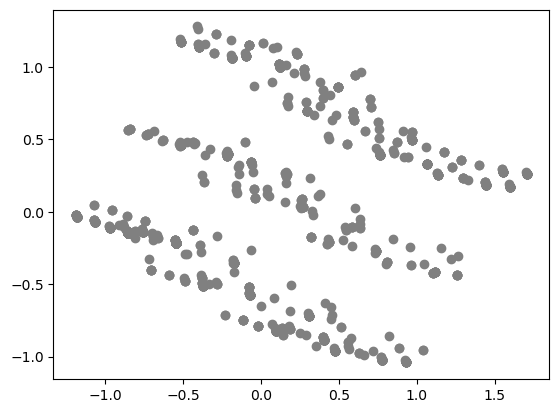

In [16]:
# Generate PCA plot
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')

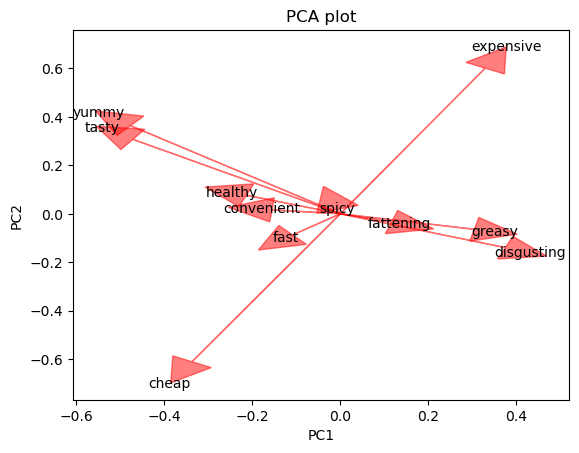

In [17]:
# Add projected axes
for i in range(loadings.shape[1]):
    plt.arrow(0, 0, loadings[0,i], loadings[1,i], color='red', alpha=0.5, head_width=0.1, head_length=0.1)
    plt.text(loadings[0,i] * 1.15, loadings[1,i] * 1.15, df.columns[i], color='black', ha='center', va='center')

# Show plot
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

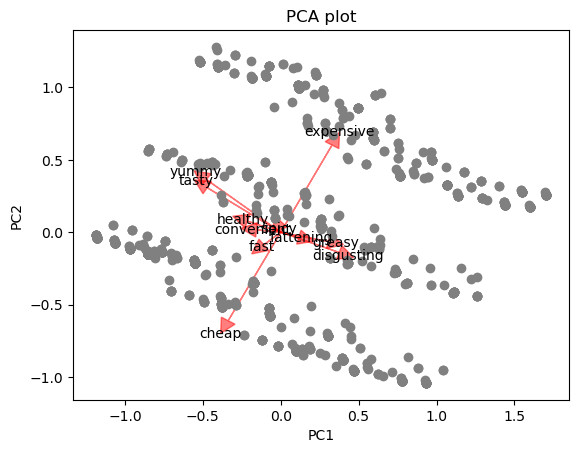

In [18]:
# Add projected axes
for i in range(loadings.shape[1]):
    plt.arrow(0, 0, loadings[0,i], loadings[1,i], color='red', alpha=0.5, head_width=0.1, head_length=0.1)
    plt.text(loadings[0,i] * 1.15, loadings[1,i] * 1.15, df.columns[i], color='black', ha='center', va='center')
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
# Show plot
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

In [19]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
MD_x_std = scaler.fit_transform(MD_x)

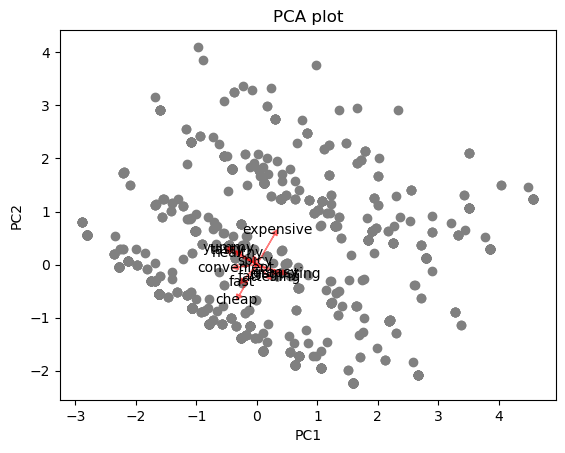

In [20]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_std)

# Generate PCA plot
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')

# Add projected axes
loadings = pca.components_
for i in range(loadings.shape[1]):
    plt.arrow(0, 0, loadings[0,i], loadings[1,i], color='red', alpha=0.5, head_width=0.1, head_length=0.1)
    plt.text(loadings[0,i] * 1.15, loadings[1,i] * 1.15, df.columns[i], color='black', ha='center', va='center')

# Show plot
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
#from flexclust import stepFlexclust, relabel
from sklearn.cluster import KMeans

In [22]:
# Perform k-means clustering
np.random.seed(1234)
n_clusters = range(2, 9)
silhouette_scores = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(MD_x_std)
    silhouette_scores.append(silhouette_score(MD_x_std, kmeans.labels_))

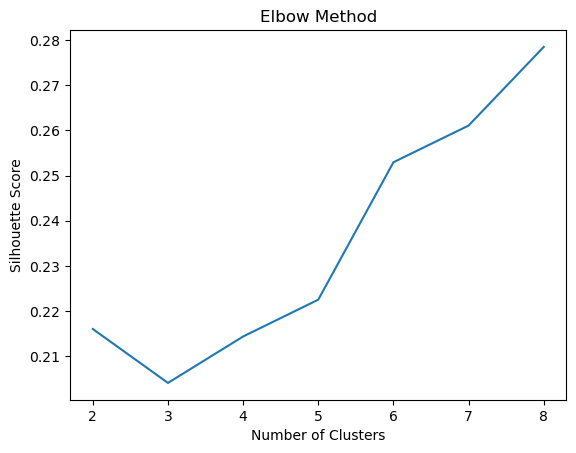

In [23]:
# Determine optimal number of clusters using elbow method
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method')
plt.show()

In [24]:
# Fit k-means clustering with optimal number of clusters
n_clusters_opt = 3
MD_kmeans = KMeans(n_clusters=n_clusters_opt, n_init=10)
MD_kmeans.fit(MD_x_std)

KMeans(n_clusters=3, n_init=10)

In [34]:
# Print cluster labels
print(MD_kmeans.labels_)
len(MD_kmeans.labels_)

[1 2 2 ... 2 0 1]


1453

In [46]:
from collections import Counter
Counter(MD_kmeans.labels_)


Counter({1: 512, 2: 764, 0: 177})

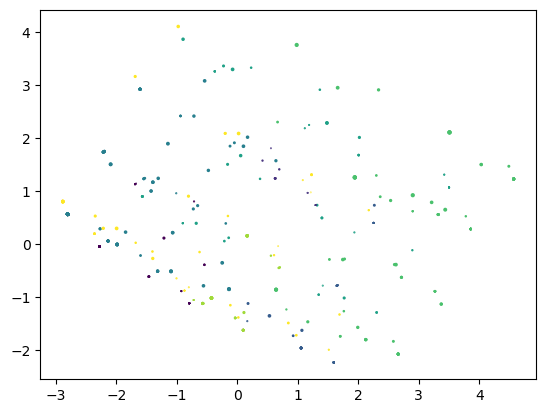

In [56]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1],MD_pca[:, 2],c=kmeans.labels_,cmap='viridis')